**Libraries Dependencies**

In [5]:
!pip install vaderSentiment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

Reading Data from file

In [6]:
br = pd.read_csv(r"/kaggle/input/amazon-books-reviews/Books_rating.csv")

In [7]:
br.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


# Data Pre-Processing

extracting useful columns

In [8]:
df = br[['Title','review/score','review/text']]

Dropping Duplicates

In [9]:
df.drop_duplicates(inplace = True)
df.shape

/tmp/ipykernel_795/3208856916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2617289, 3)

Checking and dropping null values

In [10]:
df.isna().sum()

Title           207
review/score      0
review/text       8
dtype: int64

In [11]:
df.dropna(inplace = True)
df.isna().sum()

/tmp/ipykernel_795/1508174486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


Title           0
review/score    0
review/text     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2617074 entries, 0 to 2999999
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Title         object 
 1   review/score  float64
 2   review/text   object 
dtypes: float64(1), object(2)
memory usage: 79.9+ MB


In [13]:
df.shape

(2617074, 3)

Using only the fraction of dataset to reduce the running time on big data

In [14]:
data = df.sample(30000)
data.shape

(30000, 3)

Counting the length of each review

In [15]:
data['word_count'] = data['review/text'].apply(lambda x: len(x.split(' ')))

In [16]:
data.head()

,Title,review/score,review/text,word_count
1603375,Who Moved My Cheese? An-Amazing Way to Deal wi...,4.0,This very quick read--is to the point--but pow...,103
1038229,Learn Excel from Mr. Excel: 277 Excel Mysterie...,5.0,This is a great how-to book with loads of hint...,33
566728,Adventures of Huckleberry Finn (Simple English),5.0,Ernest Hemingway has remarked that &#34;All Am...,232
1177293,Now I Can Die in Peace: How ESPN's Sports Guy ...,5.0,Why all the hata's? All these one star reviews...,162
1526563,Rotten: No Irish - No Blacks - No Dogs,4.0,I must say that I thought it was just a biogra...,110


In [17]:
data.to_csv('Review.csv', index=False)

# Sentiment Analysis

In [18]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [20]:
data.head(10)

,Title,review/score,review/text,word_count
1603375,Who Moved My Cheese? An-Amazing Way to Deal wi...,4.0,This very quick read--is to the point--but pow...,103
1038229,Learn Excel from Mr. Excel: 277 Excel Mysterie...,5.0,This is a great how-to book with loads of hint...,33
566728,Adventures of Huckleberry Finn (Simple English),5.0,Ernest Hemingway has remarked that &#34;All Am...,232
1177293,Now I Can Die in Peace: How ESPN's Sports Guy ...,5.0,Why all the hata's? All these one star reviews...,162
1526563,Rotten: No Irish - No Blacks - No Dogs,4.0,I must say that I thought it was just a biogra...,110
2354257,Choices,3.0,"I tried. I REALLY tried. However, I just could...",100
1819641,"Web Design in a Nutshell, 2nd Edition",5.0,I bought the first edition this book with no r...,171
2514786,The Demon Hand,4.0,The third installment of the adventures of Mik...,36
188562,Jane Eyre (Everyman's Classics),5.0,The interesting thing about it is that it is a...,68
1388665,Babbitt,3.0,True convictions? Never! Babbitt represents ra...,89


In [21]:
# Lower casing the reviews
data['clean_reviews'] = data['review/text'].str.lower()
# Calculating Polarity score of reviews
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
# Extracting compound column
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

In [22]:
# if compound value is more than 0.05 then it precive as positive
# if compound value is less than -0.0 then it precive as negative
# if compound value is equal to 0.0 then it precive as neutral
# scoring can be seen from the link below
# https://vadersentiment.readthedocs.io/en/latest/pages/about_the_scoring.html

data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

,Title,review/score,review/text,word_count,clean_reviews,score,compound,Sentiment
1603375,Who Moved My Cheese? An-Amazing Way to Deal wi...,4.0,This very quick read--is to the point--but pow...,103,this very quick read--is to the point--but pow...,"{'neg': 0.057, 'neu': 0.788, 'pos': 0.155, 'co...",0.8646,positive
1038229,Learn Excel from Mr. Excel: 277 Excel Mysterie...,5.0,This is a great how-to book with loads of hint...,33,this is a great how-to book with loads of hint...,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.9360,positive
566728,Adventures of Huckleberry Finn (Simple English),5.0,Ernest Hemingway has remarked that &#34;All Am...,232,ernest hemingway has remarked that &#34;all am...,"{'neg': 0.145, 'neu': 0.72, 'pos': 0.135, 'com...",-0.7930,negative
1177293,Now I Can Die in Peace: How ESPN's Sports Guy ...,5.0,Why all the hata's? All these one star reviews...,162,why all the hata's? all these one star reviews...,"{'neg': 0.028, 'neu': 0.757, 'pos': 0.215, 'co...",0.9901,positive
1526563,Rotten: No Irish - No Blacks - No Dogs,4.0,I must say that I thought it was just a biogra...,110,i must say that i thought it was just a biogra...,"{'neg': 0.017, 'neu': 0.794, 'pos': 0.189, 'co...",0.9760,positive


Distribution of Negative, Neutral and Positive Sentiment in whole corpus

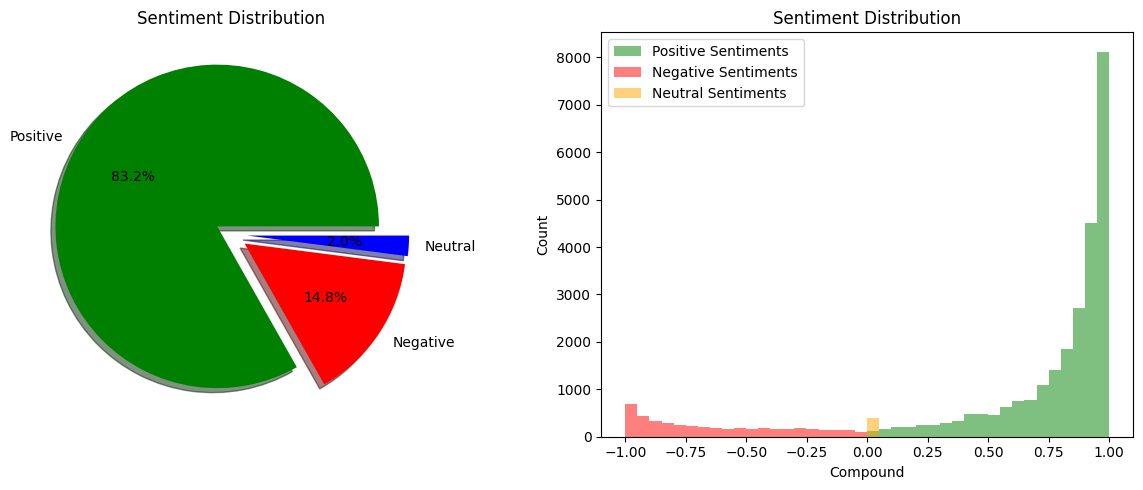

In [23]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot 1 - Pie chart for sentiment distribution
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = data['Sentiment'].value_counts()
colors = ['green', 'red', 'blue']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# Plot 2 - Histogram for sentiment distribution
plt.subplot(1, 2, 2)
positive = data[data['compound'] > 0]['compound']
negative = data[data['compound'] < 0]['compound']
neutral = data[data['compound'] == 0]['compound']

sentiments = [positive, negative, neutral]
colors = ['green', 'red', 'orange']
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title('Sentiment Distribution')
plt.xlabel('Compound')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

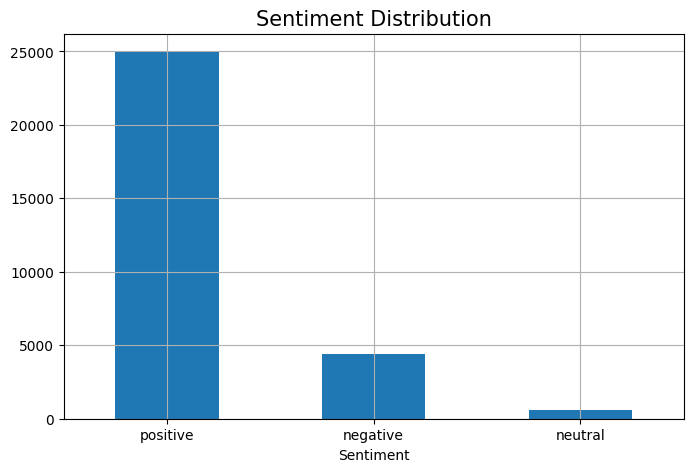

In [24]:
data['Sentiment'].value_counts().plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

Dataframe of Reviews vs Sentiments

In [25]:
reviews_df = data[['clean_reviews', 'Sentiment']]

In [26]:
reviews_df.head()

,clean_reviews,Sentiment
1603375,this very quick read--is to the point--but pow...,positive
1038229,this is a great how-to book with loads of hint...,positive
566728,ernest hemingway has remarked that &#34;all am...,negative
1177293,why all the hata's? all these one star reviews...,positive
1526563,i must say that i thought it was just a biogra...,positive


Dividing Data into x & y

In [27]:
x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

In [28]:
x.shape

(30000, 1)

In [29]:
y.shape

(30000,)

# text - preprocessing

In [30]:
import numpy as np # basic Libraries
import pandas as pd
import seaborn as sns
import nltk

In [31]:
!pip install -U nltk

In [32]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
import re # regular expression module
stemmer = nltk.SnowballStemmer("english") # for stemming
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english')) # for stopword

In [34]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [35]:
def hapus_url(text):
    return re.sub(r'http\S+','', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def lemmi(text):
    lemmatizer = WordNetLemmatizer()
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def final_clean(text):
    final_text= []
    for i in text.split():
        if i.strip().lower() not in stopword and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

In [36]:
def clean(text):
    text = hapus_url(text)
    text = remove_special_characters(text, remove_digits=True)
    text = lemmi(text)
    text = final_clean(text)
    return text

In [37]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

Archive:  /kaggle/working/corpora/wordnet.zip


[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
replace /kaggle/working/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [38]:
x["clean_reviews"] = x["clean_reviews"].apply(clean)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0, stratify=y)

In [40]:
x_train

,clean_reviews
2342425,anyone read quotpretentious intellectual selfa...
1119189,giftby julie garwood already ha lot review sor...
50319,loved book actually finished le week understan...
2892860,reaching back reach heart mind leaf wondering ...
461480,cretin deprived child classic long story sambo...
...,...
1548577,hate dystopian novel part neither fishnorfowl ...
2601717,give melba patillo beals novel warrior dont cr...
2021656,book pretty good first read anyone suspecting ...
1697280,loved book wa well written thought provoking s...


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tfidf_vectorizer = TfidfVectorizer()  # You can adjust the max_features parameter

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

# Transform the 'clean_reviews' column on the testing data
x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

In [43]:
x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df =  pd.DataFrame(x_test_tfidf.toarray())

Balancing Data

In [44]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
oversample = SMOTE()
x_train_bal, y_train_bal = oversample.fit_resample(x_train_tfidf, y_train)
y_train_bal.value_counts()

Sentiment
positive    18719
negative    18719
neutral     18719
Name: count, dtype: int64

In [45]:
x_test_bal, y_test_bal = oversample.fit_resample(x_test_tfidf, y_test)
y_test_bal.value_counts()

Sentiment
positive    6239
negative    6239
neutral     6239
Name: count, dtype: int64

# Model Trainig

# Logistic Regression

Applying Logistic Regression on Imbalanced Data

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [47]:
log = LogisticRegression()
log.fit(x_train_tfidf_df, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
perd_log=log.predict(x_test_tfidf_df)

In [49]:
print(classification_report(y_test, perd_log, zero_division=0))

              precision    recall  f1-score   support

    negative       0.82      0.31      0.45      1108
     neutral       0.00      0.00      0.00       153
    positive       0.87      0.99      0.93      6239

    accuracy                           0.87      7500
   macro avg       0.57      0.43      0.46      7500
weighted avg       0.85      0.87      0.84      7500



In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,perd_log)

array([[ 348,    0,  760],
       [  14,    0,  139],
       [  61,    0, 6178]])

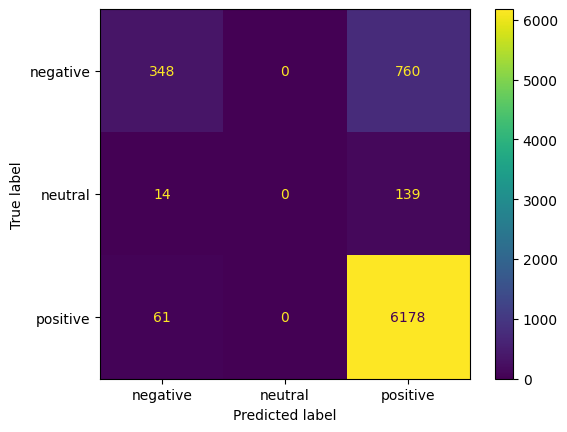

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, perd_log, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

Applying Logistic Regression on Balanced Data

In [52]:
log_bal = LogisticRegression()
log_bal.fit(x_train_bal, y_train_bal)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
perd_log_bal =log_bal.predict(x_test_bal)

In [54]:
print(classification_report(y_test_bal, perd_log_bal))

              precision    recall  f1-score   support

    negative       0.63      0.74      0.68      6239
     neutral       0.83      0.19      0.31      6239
    positive       0.57      0.91      0.70      6239

    accuracy                           0.61     18717
   macro avg       0.68      0.61      0.56     18717
weighted avg       0.68      0.61      0.56     18717



In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_bal,perd_log_bal)

array([[4614,  155, 1470],
       [2223, 1180, 2836],
       [ 485,   79, 5675]])

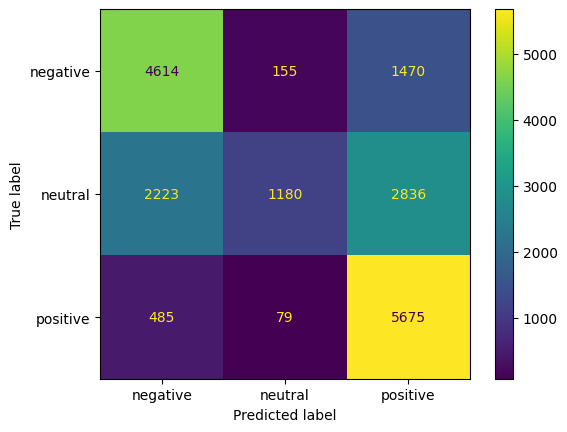

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_bal, perd_log_bal, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

# Decision Tree

Decision tree on imbalanced Data

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier.fit(x_train_tfidf_df, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [59]:
pred_tre = classifier.predict(x_test_tfidf_df)

In [60]:
print(classification_report(y_test, pred_tre))

              precision    recall  f1-score   support

    negative       0.34      0.30      0.32      1108
     neutral       0.14      0.12      0.13       153
    positive       0.86      0.89      0.88      6239

    accuracy                           0.78      7500
   macro avg       0.45      0.43      0.44      7500
weighted avg       0.77      0.78      0.78      7500



In [61]:
confusion_matrix(y_test,pred_tre)

array([[ 329,   23,  756],
       [  23,   18,  112],
       [ 614,   85, 5540]])

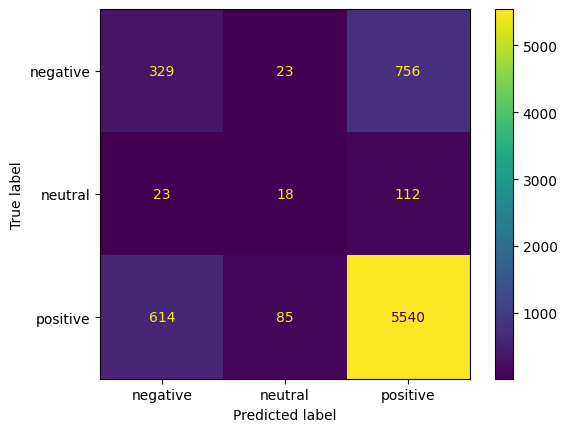

In [62]:
cm = confusion_matrix(y_test, pred_tre, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

Decision tree on balanced data

In [63]:
classifier_bal= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier_bal.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [64]:
pred_tre_bal = classifier_bal.predict(x_test_bal)

In [65]:
print(classification_report(y_test_bal, pred_tre_bal))

              precision    recall  f1-score   support

    negative       0.54      0.56      0.55      6239
     neutral       0.73      0.21      0.33      6239
    positive       0.49      0.81      0.61      6239

    accuracy                           0.53     18717
   macro avg       0.58      0.53      0.49     18717
weighted avg       0.58      0.53      0.49     18717



In [66]:
confusion_matrix(y_test_bal,pred_tre_bal)

array([[3478,  290, 2471],
       [2022, 1319, 2898],
       [ 981,  191, 5067]])

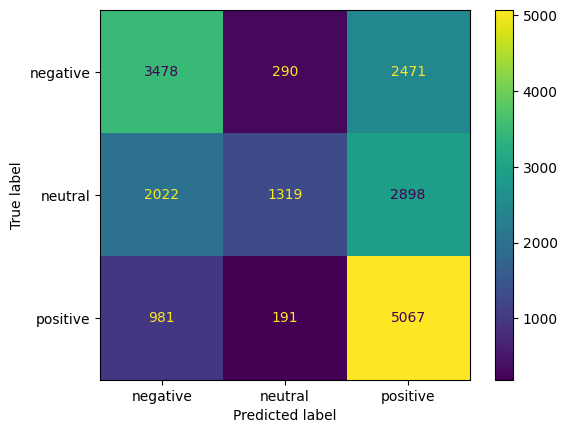

In [67]:
cm = confusion_matrix(y_test_bal, pred_tre_bal, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

# Saving the best model

In [68]:
import pickle

In [69]:
pickle.dump(log_bal, open('log_bal.pkl','wb'))

In [70]:
with open('log_bal','wb') as f:
  pickle.dump(log_bal,f)

In [71]:
with open('log_bal','rb') as f:
  mp=pickle.load(f)

In [72]:
def predict(text):
  input_text = [text]
  text_to_vec = tfidf_vectorizer.transform(input_text).toarray() 
  prediction = mp.predict(text_to_vec)
  return prediction

In [73]:
User_input = input("Enter your text:")
output = predict(User_input)
print(output)

Enter your text: this book is great but the story is to long


['positive']
